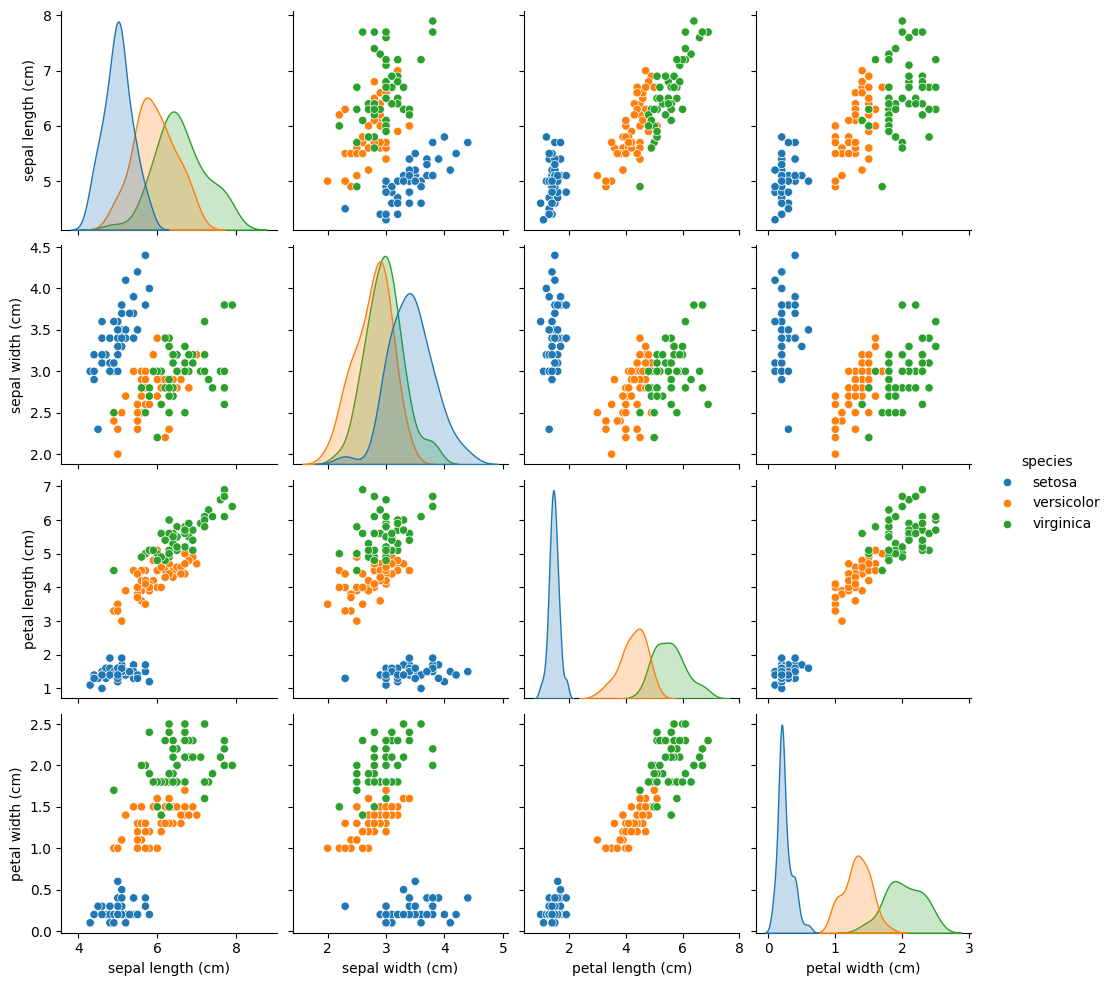

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # Import the Iris dataset

# Load the Iris dataset
iris = load_iris()

# Load data into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Create the pair plot
sns.pairplot(iris_df, hue='species')

# Display the plot
plt.show()


In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # Import the Iris dataset
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # Import accuracy_score for evaluation

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bagging Classifier with a Decision Tree as the base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(), # Changed from base_estimator to estimator
    n_estimators=100,                       # Number of base estimators in the ensemble
    random_state=42                         # For reproducibility
)

# Train the Bagging Classifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.2f}")

Bagging Classifier Accuracy: 1.00


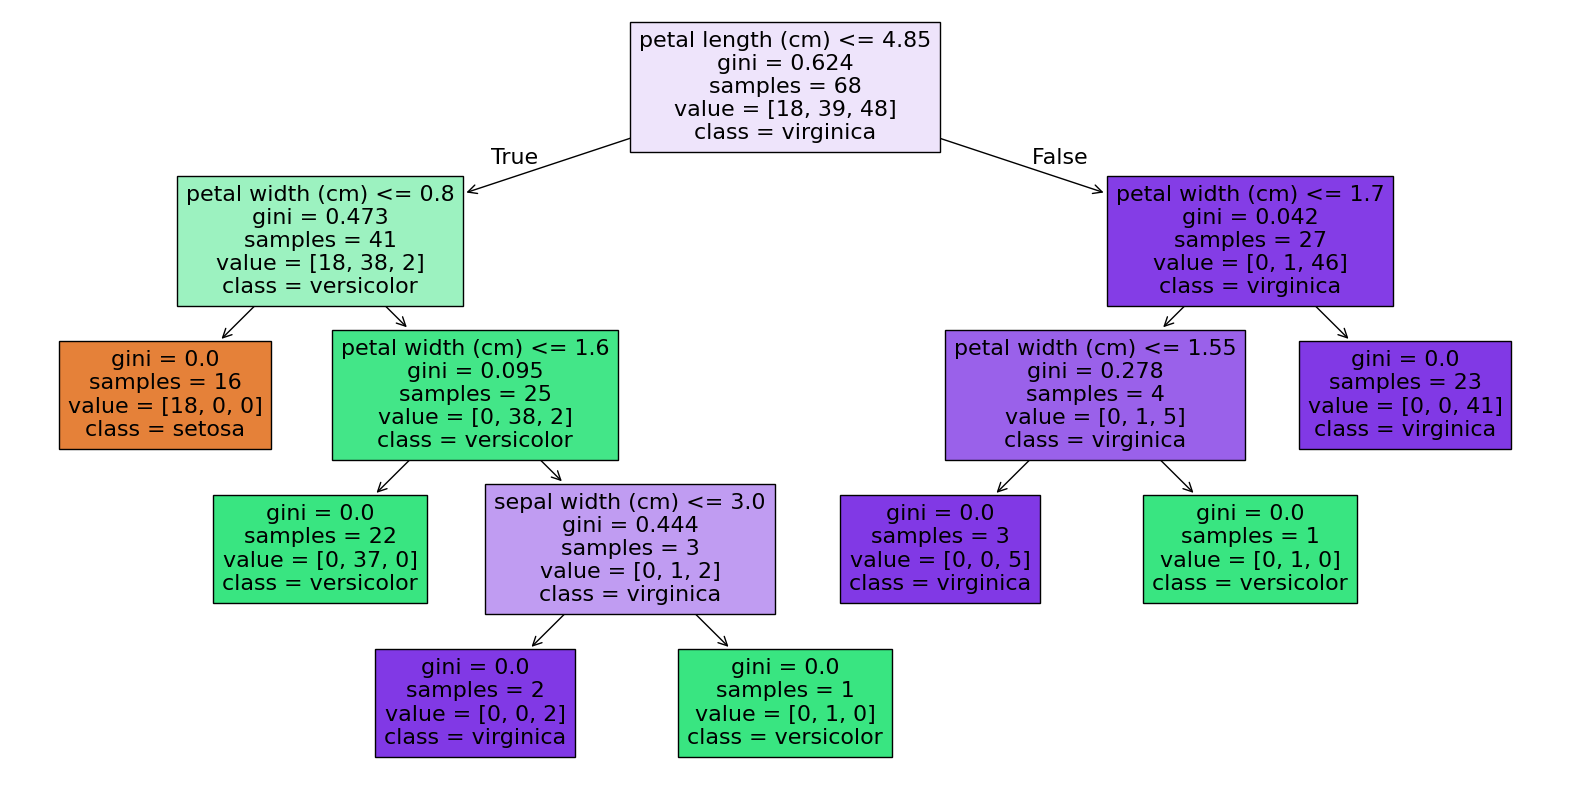

In [10]:
from sklearn.tree import plot_tree

# Visualize one of the trees from the Bagging model
plt.figure(figsize=(20,10))
plot_tree(bagging_clf.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # Import the Iris dataset
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier # Import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # Import accuracy_score for evaluation

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bagging Classifier with a Decision Tree as the base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(), # Changed from base_estimator to estimator
    n_estimators=100,                       # Number of base estimators in the ensemble
    random_state=42                         # For reproducibility
)

# Train the Bagging Classifier on the training data
bagging_clf.fit(X_train, y_train)

y_pred_bagging = bagging_clf.predict(X_test)

# Calculate and print the accuracy of the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.2f}")

# Initialize the AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=100,
    random_state=42
)

# Train the AdaBoost Classifier on the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions on the test data for AdaBoost
y_pred_adaboost = adaboost_clf.predict(X_test)

# Calculate and print the accuracy of the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Classifier Accuracy: {accuracy_adaboost:.2f}")

Bagging Classifier Accuracy: 1.00
AdaBoost Classifier Accuracy: 1.00


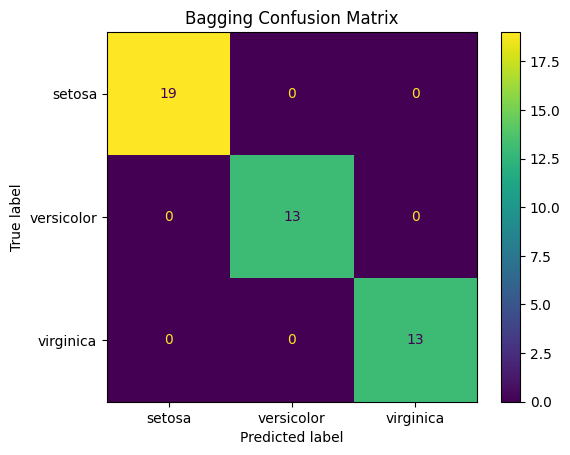

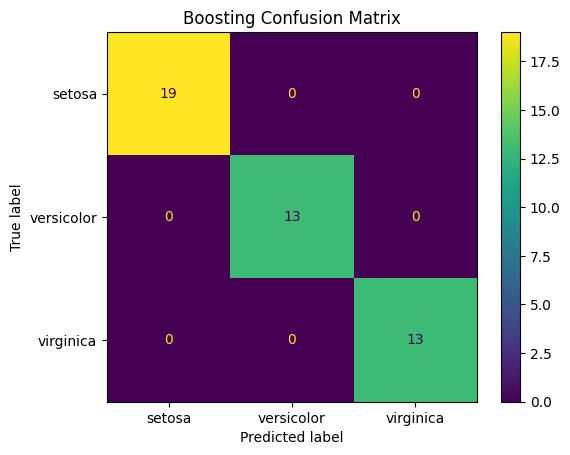

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Bagging Confusion Matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
disp_bagging = ConfusionMatrixDisplay(confusion_matrix=cm_bagging, display_labels=iris.target_names)
disp_bagging.plot()
plt.title("Bagging Confusion Matrix")
plt.show()

# Boosting Confusion Matrix
cm_boosting = confusion_matrix(y_test, y_pred_adaboost)
disp_boosting = ConfusionMatrixDisplay(confusion_matrix=cm_boosting, display_labels=iris.target_names)
disp_boosting.plot()
plt.title("Boosting Confusion Matrix")
plt.show()

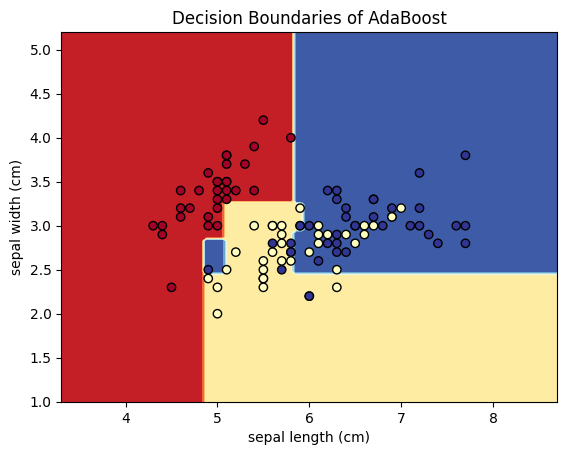

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We'll use the first two features for visualization
X_for_viz = X_train[:, :2]
y_for_viz = y_train

adaboost_viz_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), # A shallow tree (max_depth=1) is common for AdaBoost base estimators
    n_estimators=100,                               # Number of weak learners
    random_state=42                                 # For reproducibility
)
adaboost_viz_clf.fit(X_for_viz, y_for_viz)

# Create the decision boundary plot
DecisionBoundaryDisplay.from_estimator(
    adaboost_viz_clf, X_for_viz, response_method="predict",
    cmap=plt.cm.RdYlBu, # Colormap for the decision regions
    xlabel=iris.feature_names[0], # Label for the x-axis (first feature)
    ylabel=iris.feature_names[1]  # Label for the y-axis (second feature)
)


plt.scatter(X_for_viz[:, 0], X_for_viz[:, 1], c=y_for_viz, cmap=plt.cm.RdYlBu, edgecolor='k')

plt.title("Decision Boundaries of AdaBoost")

plt.show()


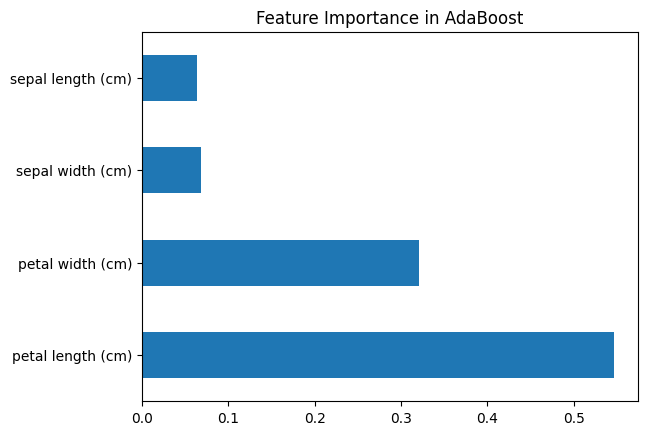

In [17]:
import pandas as pd

feature_importances = pd.Series(adaboost_clf.feature_importances_, index=iris.feature_names)
feature_importances.nlargest(4).plot(kind='barh')
plt.title("Feature Importance in AdaBoost")
plt.show()

In [19]:
from sklearn.metrics import classification_report

# Bagging Report
print("Bagging Classification Report:")
print(classification_report(y_test, y_pred_bagging, target_names=iris.target_names))

# Boosting Report
print("\nBoosting Classification Report:")
print(classification_report(y_test, y_pred_adaboost, target_names=iris.target_names))

Bagging Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Boosting Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

